# Лабораторная работа 7

### Вариант 1

Аминов С.С.
М8О-408Б-19

Целью работы является исследование свойств автоассоциативных сетей с узким горлом, алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного анализа главных компонент набора данных.

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Layer

import matplotlib.pyplot as plt

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
X_train, y_train = train
X_test, y_test = test

In [6]:
X_train = np.array([X_train[i] for i in range(len(X_train)) if y_train[i] == 1])
X_test = np.array([X_test[i] for i in range(len(X_test)) if y_test[i] == 1])

In [7]:
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.encoder = keras.Sequential([
            keras.layers.Flatten(),
            keras.layers.Dense(32*32*3 / 4, activation='relu'),
            keras.layers.Dense(32*32*3 / 16, activation='sigmoid'),
        ])
        self.decoder = keras.Sequential([
            keras.layers.Dense(32*32*3 / 4, activation='relu'),
            keras.layers.Dense(32*32*3, activation='sigmoid'),
            keras.layers.Reshape((32, 32, 3)),
        ])
    
    def call(self, input):
        input = input / 255
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded * 255
    
    def call_change_kernel_neuron(self, input, id, value):
        input = input / 255
        encoded = np.array(self.encoder(input))
        print('real values: ', encoded[:, id])
        encoded[:, id] = value
        decoded = self.decoder(encoded)
        return decoded * 255

In [9]:
model = AutoEncoder()

In [10]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae'],
)

In [11]:
train_info = model.fit(
    X_train, X_train,
    validation_data=(X_test, X_test),
    batch_size=128,
    epochs=100,
)

Epoch 1/100
40/40 [==============================] - 2s 35ms/step - loss: 3493.7280 - mae: 48.5643 - val_loss: 2730.9175 - val_mae: 42.2080
Epoch 2/100
40/40 [==============================] - 1s 32ms/step - loss: 2531.2339 - mae: 40.3348 - val_loss: 2335.5110 - val_mae: 38.4911
Epoch 3/100
40/40 [==============================] - 1s 31ms/step - loss: 2134.9036 - mae: 36.6071 - val_loss: 2003.2996 - val_mae: 35.4026
Epoch 4/100
40/40 [==============================] - 1s 32ms/step - loss: 1872.8628 - mae: 33.9636 - val_loss: 1786.4336 - val_mae: 33.0490
Epoch 5/100
40/40 [==============================] - 1s 31ms/step - loss: 1714.9620 - mae: 32.2782 - val_loss: 1770.2739 - val_mae: 32.7534
Epoch 6/100
40/40 [==============================] - 1s 31ms/step - loss: 1661.2382 - mae: 31.6763 - val_loss: 1734.6630 - val_mae: 32.5019
Epoch 7/100
40/40 [==============================] - 1s 31ms/step - loss: 1587.2219 - mae: 30.8852 - val_loss: 1569.8270 - val_mae: 30.6776
Epoch 8/100
40/40 [=

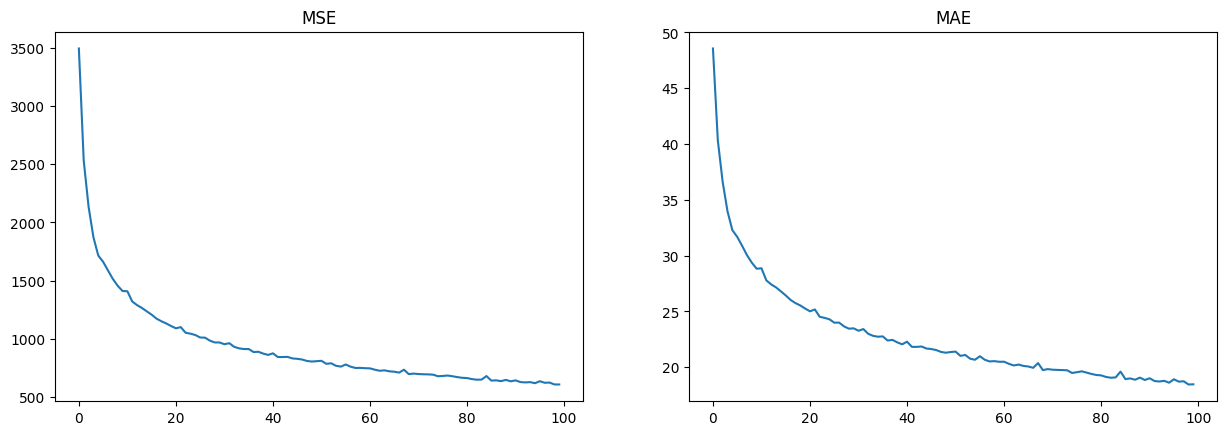

In [13]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
ax[0].set_title('MSE')
ax[1].set_title('MAE')
ax[0].plot(range(100), train_info.history['loss'])
ax[1].plot(range(100), train_info.history['mae'])

In [28]:
def plot_results(original, decoded):
    plt.figure(figsize=(40, 8))

    for i in range(3):
        # display original
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(original[i])

        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, 10, i + 1 + 10)
        plt.imshow(decoded[i])

        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [29]:
random_train = X_train[np.random.choice(X_train.shape[0], 3)]
random_train_decoded = tf.cast(model(random_train), 'int32')

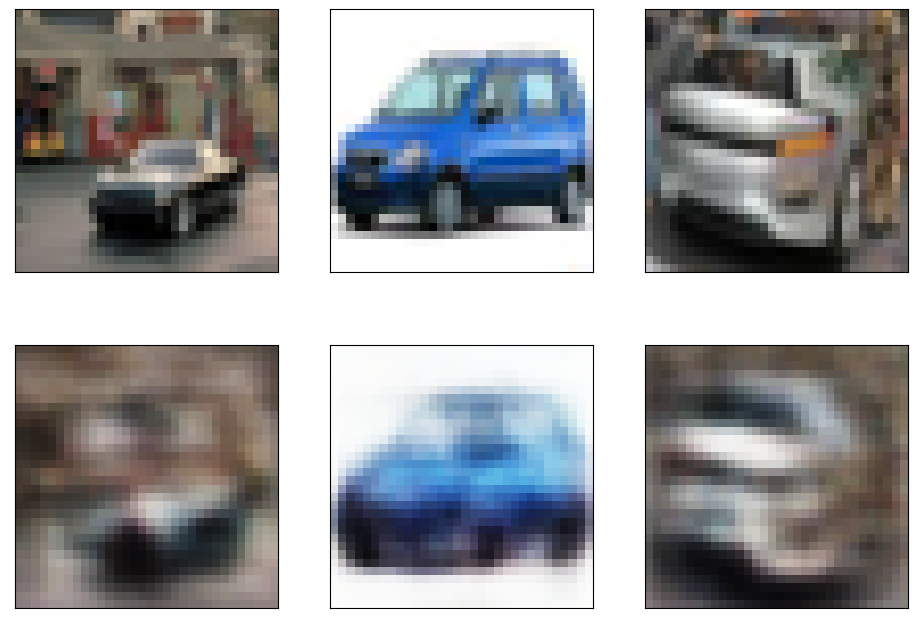

In [30]:
plot_results(random_train, random_train_decoded)